***
$\mathbf{\text{Двумерная задача переноса и диффузии. Детерменированная модель}}$<br>
***
1.&emsp; Формула двумерного уравнения диффузии
\begin{equation}
    \frac{\partial u}{\partial t} = c \frac{\partial^2 u}{\partial x^2} + c \frac{\partial^2 u}{\partial y^2}
\end{equation}
&emsp; &emsp; (1.1)
\begin{equation}
    \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = c \frac{u_{i+1,j}^{n} - 2u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + c \frac{u_{i,j+1}^{n} - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}
\end{equation}
&emsp; &emsp; (1.2)
\begin{equation}
    u_{i,j}^{n+1} = u_{i,j}^n + \frac{c \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + \frac{c \Delta t}{\Delta y^2}(u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{equation}
&emsp; &emsp; 
\begin{equation}
    0.5 \leq x \leq 1 \quad и \quad 0.5 \leq y \leq 1
\end{equation}
<!-- &emsp; &emsp; (1.3)
\begin{equation}
    \begin{cases}
    \partial x_i = c_x dt + \sigma dw_{i}^x\\
    \partial y_i = c_y dt + \sigma dw_{i}^y
    \end{cases}    
\end{equation}
&emsp; &emsp; (1.4) 
\begin{equation}
    div(\overrightarrow{c} u) = \sigma div u
\end{equation} -->

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 31
ny = 31
nt = 100
c = 1
nu = .25 #вязкость
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  
un = np.ones((ny, nx))
v = np.ones((ny, nx))
vn = np.ones((ny, nx))

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

In [3]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
  
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    X, Y = np.meshgrid(x, y)
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

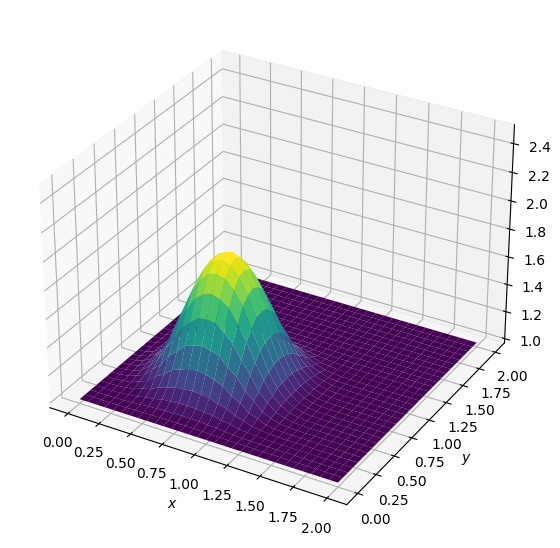

In [4]:
diffuse(10)

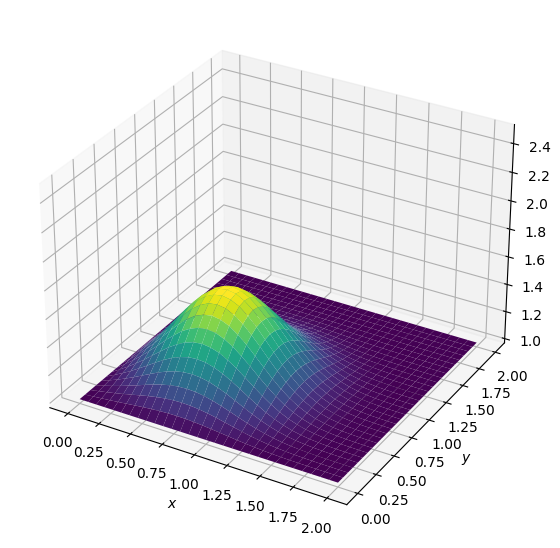

In [5]:
diffuse(30)

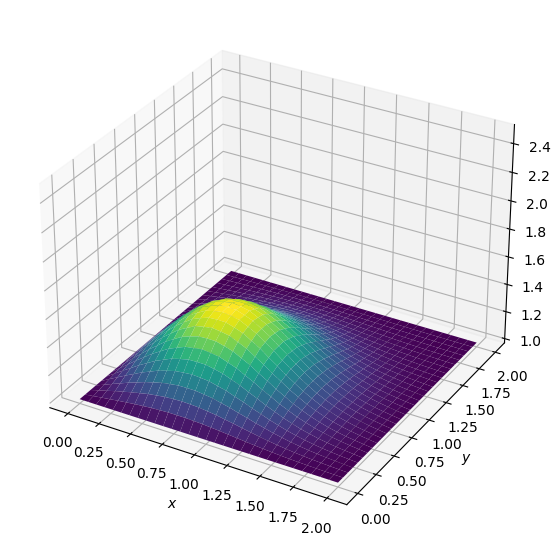

In [6]:
diffuse(50)

1.&emsp; Формула двумерного уравнения конвекции:
\begin{equation}
    \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0
\end{equation}
\begin{equation}
    \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0
\end{equation}
&emsp; &emsp; (1.1)
\begin{equation}
    \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^{n} \frac{u_{i+1,j}^{n} + u_{i-1,j}^n}{\Delta x} + v_{i,j}^{n}\frac{u_{i,j+1}^{n} + u_{i,j-1}^n}{\Delta y} = 0
\end{equation}
\begin{equation}
    \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^{n} \frac{v_{i+1,j}^{n} + v_{i-1,j}^n}{\Delta x} + v_{i,j}^{n}\frac{v_{i,j+1}^{n} + v_{i,j-1}^n}{\Delta y} = 0
\end{equation}
&emsp; &emsp; (1.2)
\begin{equation}
    u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x}(u_{i+1,j}^n - u_{i-1,j}^n) - v_{i,j}^{n} \frac{ \Delta t}{\Delta y}(u_{i,j+1}^n - u_{i,j-1}^n)
\end{equation}
\begin{equation}
    v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x}(v_{i+1,j}^n - v_{i-1,j}^n) - v_{i,j}^{n} \frac{ \Delta t}{\Delta y}(v_{i,j+1}^n - v_{i,j-1}^n)
\end{equation}
&emsp; &emsp; Начальные условия
$$
u, v=\begin{cases}
			2, & \text{при $x,y \in (0.5,1) \times (0.5,1)$}\\
            1, & \text{в остальных}
		 \end{cases}
$$
&emsp; &emsp; Граничные условия
$$
u = 1, v = 1 \quad при \quad \begin{cases}
			x = 0.2\\
            y = 0.2
		 \end{cases}
$$

In [7]:
for n in range(nt + 1): 
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

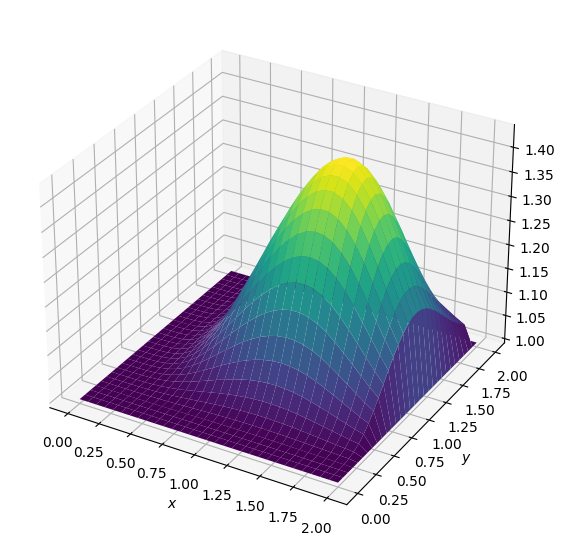

In [8]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1,
               linewidth=0, antialiased=True)
#ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');